(poly1d([ 0.01724484, -0.06401216,  0.08116045, -0.04022119,  7.55539533]), 19415.583333333332)


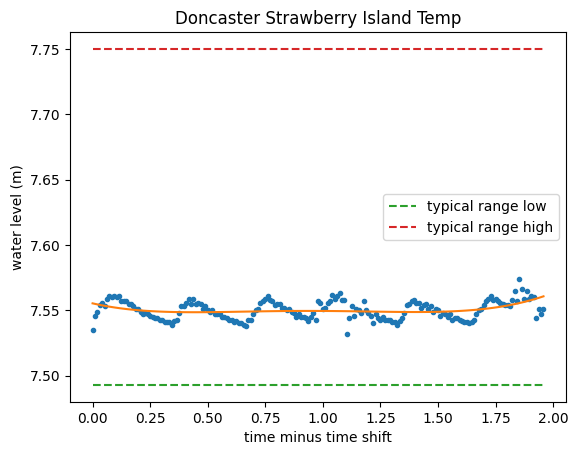

(poly1d([-0.01371903,  0.14219563, -0.26002215,  0.09642845,  2.21053767]), 19415.583333333332)


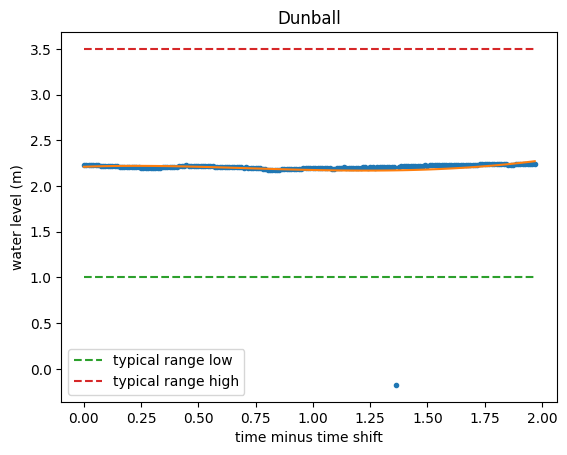

(poly1d([-0.05698803,  0.212553  , -0.20368115,  0.01978582,  2.17462784]), 19415.583333333332)


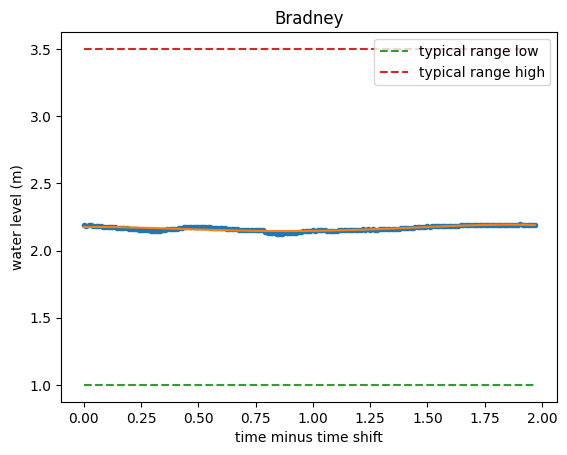

(poly1d([-0.01157634,  0.04804854, -0.06279826,  0.02391198,  0.97466456]), 19415.583333333332)


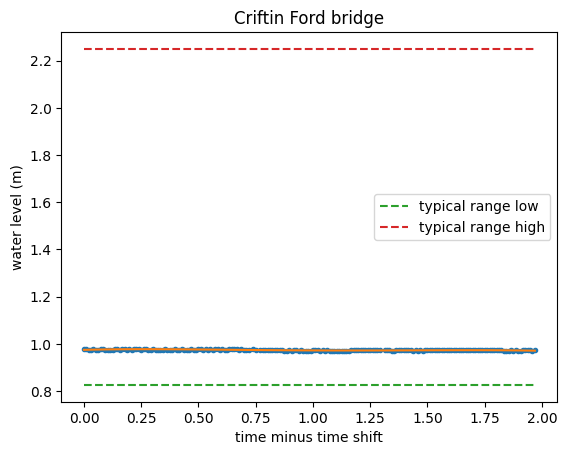

(poly1d([ 0.01724484, -0.06401216,  0.08116045, -0.04022119,  7.55539533]), 19415.583333333332)


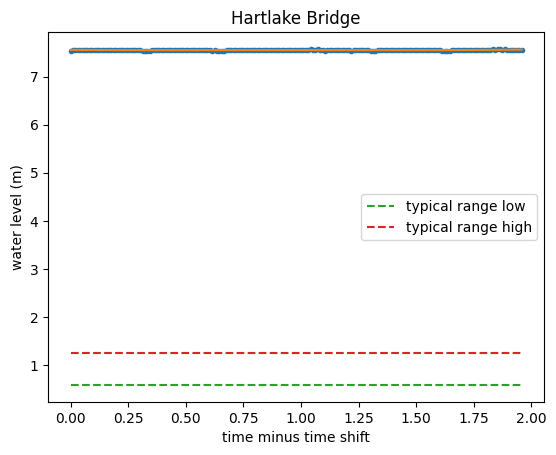

In [5]:
import datetime
from floodsystem.stationdata import build_station_list, update_water_levels
from floodsystem.datafetcher import fetch_measure_levels
from floodsystem.plot import plot_water_level_with_fit
from floodsystem.analysis import polyfit
import matplotlib.pyplot as plt
import matplotlib.dates

def run():
    stations = build_station_list()
    update_water_levels(stations)

    N = len(stations)
    while N > 0:
        for i in range(N - 1):
            a1 = stations[i].latest_level
            a2 = stations[i + 1].latest_level
            if type(a1) == float and type(a2) == float:
                if a1 > a2:
                    stations[i + 1], stations[i] = stations[i], stations[i + 1]
            else:
                pass
                    
        N = N - 1

    dt = 2

    dates, levels = fetch_measure_levels(stations[-1].measure_id,dt=datetime.timedelta(days=dt))
    print(polyfit(dates, levels, 4))
    plot_water_level_with_fit(stations[-1], dates, levels, 4)

    dates2, levels2 = fetch_measure_levels(stations[-2].measure_id,dt=datetime.timedelta(days=dt))
    print(polyfit(dates2, levels2, 4))
    plot_water_level_with_fit(stations[-2], dates2, levels2, 4)

    dates3, levels3 = fetch_measure_levels(stations[-3].measure_id,dt=datetime.timedelta(days=dt))
    print(polyfit(dates3, levels3, 4))
    plot_water_level_with_fit(stations[-3], dates3, levels3, 4)

    dates4, levels4 = fetch_measure_levels(stations[-4].measure_id,dt=datetime.timedelta(days=dt))
    print(polyfit(dates4, levels4, 4))
    plot_water_level_with_fit(stations[-4], dates4, levels4, 4)

    dates5, levels5 = fetch_measure_levels(stations[-1].measure_id,dt=datetime.timedelta(days=dt))
    print(polyfit(dates5, levels5, 4))
    plot_water_level_with_fit(stations[-5], dates5, levels5, 4)


if __name__ == "__main__":
    run()

